# `DSML_WS_09` - Group Project Q&A

This week, we will use the workshop timeslot to work on the group projects. Therefore, we only have the following content in this notebook:

- **Task**: Predicting electricity demand - continued

---

## 1. Task: Predicting electricity demand - continued

In the preparation task for workshop 8, you predicted **average electrical load** from **average temperature** using polynomial features with `scikit learn`. Let us continue from there by doing the following: 

- Load data and filter dataframe to exclude any observations with `Avg_temp` outside the range of -20 to +30 degrees.
- Define X and y vectors, and perform train/test split.
- Create polynomial features up to degree 50 and scale using `StandardScaler`.
- Initialize and fit model using `LinearRegression`.
- Initialize and fit second model with appropriate alpha using `Ridge`.
- Initialize and fit third model with appropriate alpha using `Lasso`.
- Initialize and fit fourth model with appropriate value for n_neighbors using `KNeighborsRegressor`.
- Compare model performances using `mean_absolute_error` and `r2_score`.
- **Extra task**: for each of the four models, create a scatter plot of the test data and plot the regression line on top of it.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
# load data
df = pd.read_csv("Pittsburgh_load_data.csv")

# limit data points to range -20 to 30
df = df[(df["Avg_temp"] >= -20) & (df["Avg_temp"] <= 30)]

df.head()

,Date,AVG,MAX,MIN,Total,High_temp,Avg_temp
0,01.01.2013,1.598524,1.859947,0.001599,38.368031,0.0,-1.68
1,02.01.2013,1.809347,2.054215,0.001809,43.428194,-3.9,-6.58
2,03.01.2013,1.832822,2.049550,0.001833,43.991607,0.6,-6.12
3,04.01.2013,1.812699,2.008168,0.001813,43.508609,0.0,-1.95
4,05.01.2013,1.662036,1.838251,0.001662,39.892360,1.7,-1.47


In [3]:
# define X and y vectors
xa = df["Avg_temp"]
ya = df["AVG"]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(xa, ya, test_size=0.3,random_state=42)

# create poly features
poly_reg = PolynomialFeatures(degree = 50, include_bias = False)
X_train_poly = poly_reg.fit_transform(X_train.values.reshape(-1,1))
X_test_poly = poly_reg.transform(X_test.values.reshape(-1,1))

# scale
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# initialize and fit linear model
linear_model = LinearRegression()
linear_model.fit(X_train_poly_scaled,y_train)
linear_model_predictions = linear_model.predict(X_test_poly_scaled)

# initialize and fit ridge model
ridge_model = Ridge(alpha = 0.1, solver = 'lsqr')
ridge_model.fit(X_train_poly_scaled,y_train)
ridge_model_predictions = ridge_model.predict(X_test_poly_scaled)

# initialize and fit lasso model
lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(X_train_poly_scaled,y_train)
lasso_model_predictions = lasso_model.predict(X_test_poly_scaled)

# initialize and fit knn model
knn_model = KNeighborsRegressor(n_neighbors=25)
knn_model.fit(X_train_poly_scaled,y_train)
knn_model_predictions = knn_model.predict(X_test_poly_scaled)

# compare model performances
Decimals = 4
print("Linear model - MAE: ", round(mean_absolute_error(y_test, linear_model_predictions),Decimals) , " R2: ", round(r2_score(y_test, linear_model_predictions),Decimals) )
print("Ridge model - MAE: ", round(mean_absolute_error(y_test, ridge_model_predictions),Decimals) , " R2: ", round(r2_score(y_test, ridge_model_predictions),Decimals) )
print("Lasso model - MAE: ", round(mean_absolute_error(y_test, lasso_model_predictions),Decimals) , " R2: ", round(r2_score(y_test, lasso_model_predictions),Decimals) )
print("KNN model - MAE: ", round(mean_absolute_error(y_test, knn_model_predictions),Decimals) , " R2: ", round(r2_score(y_test, knn_model_predictions),Decimals) )

Linear model - MAE:  0.0904  R2:  0.7675
Ridge model - MAE:  0.0897  R2:  0.7703
Lasso model - MAE:  0.0971  R2:  0.7376
KNN model - MAE:  0.0916  R2:  0.7584


In [4]:
# EXTRA TASK
# define poly x scaled for full x range
x_full_range = np.linspace(-20, 30, 1000)
x_full_poly = poly_reg.transform(x_full_range.reshape(-1,1))
x_full_poly_scaled = scaler.transform(x_full_poly)

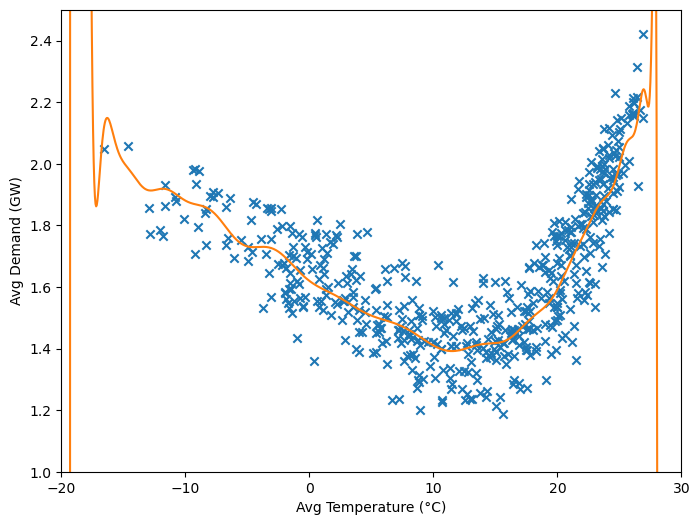

In [5]:
# plot linear model
plt.figure(figsize = (8,6))
plt.scatter(X_test, y_test, marker="x")
plt.plot(x_full_range, linear_model.predict(x_full_poly_scaled), color='C1')
plt.xlim(-20,30)
plt.ylim(1,2.5)
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("Avg Demand (GW)")
plt.show()

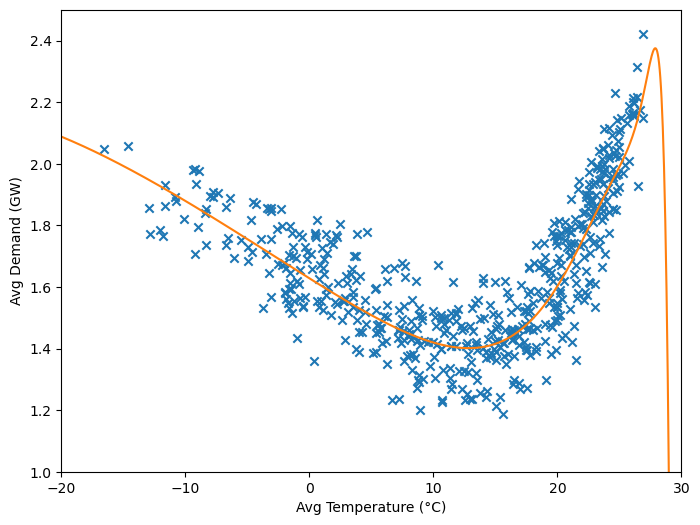

In [6]:
# plot ridge model
plt.figure(figsize = (8,6))
plt.scatter(X_test, y_test, marker="x")
plt.plot(x_full_range, ridge_model.predict(x_full_poly_scaled), color='C1')
plt.xlim(-20,30)
plt.ylim(1,2.5)
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("Avg Demand (GW)")
plt.show()

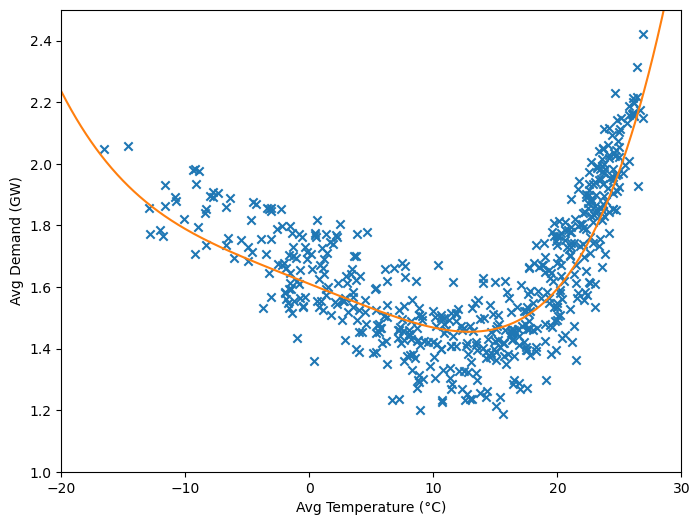

In [7]:
# plot lasso model
plt.figure(figsize = (8,6))
plt.scatter(X_test, y_test, marker="x")
plt.plot(x_full_range, lasso_model.predict(x_full_poly_scaled), color='C1')
plt.xlim(-20,30)
plt.ylim(1,2.5)
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("Avg Demand (GW)")
plt.show()

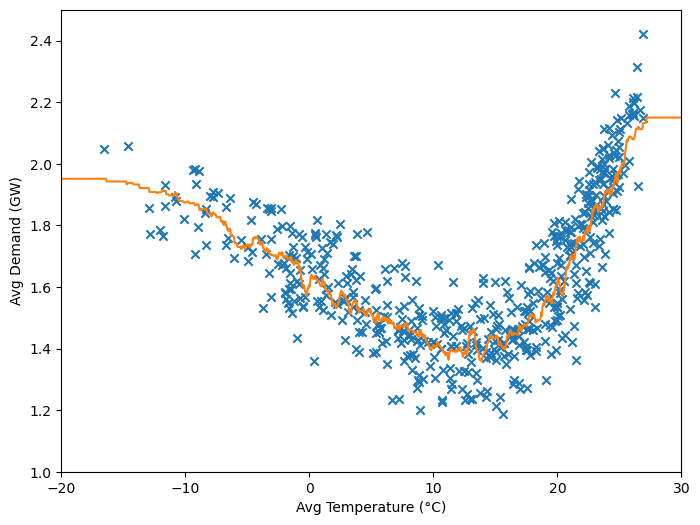

In [8]:
# plot knn model
plt.figure(figsize = (8,6))
plt.scatter(X_test, y_test, marker="x")
plt.plot(x_full_range, knn_model.predict(x_full_poly_scaled), color='C1')
plt.xlim(-20,30)
plt.ylim(1,2.5)
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("Avg Demand (GW)")
plt.show()

In [10]:
# EXTRA: Take a look at the Coefficients
LIN_Theta = ([linear_model.intercept_, *linear_model.coef_])
RIDGE_Theta = ([ridge_model.intercept_, *ridge_model.coef_])
LASSO_Theta = ([lasso_model.intercept_, *lasso_model.coef_])

pd.DataFrame({"Linear": LIN_Theta,
              "Ridge": RIDGE_Theta,
              "Lasso": LASSO_Theta})

,Linear,Ridge,Lasso
0,1.619987e+00,1.619987,1.619987
1,-3.148696e-01,-0.260116,-0.165086
2,1.423170e+00,0.028209,0.000000
3,-2.280174e+00,0.102271,0.000000
4,-9.697679e+01,0.093029,0.229914
5,3.368441e+02,0.090867,0.000000
6,2.487237e+03,0.059795,0.022135
7,-1.073702e+04,0.040744,0.000000
8,-3.068104e+04,0.019162,0.000000
9,1.699026e+05,0.003481,0.000000


---